Read Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [15]:
#how to read data in google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1MKWkSZxWVs93ideKBJZMUlXbLlz0M1SEkiMJqL3Rrac/edit#gid=1666191194'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1MKWkSZxWVs93ideKBJZMUlXbLlz0M1SEkiMJqL3Rrac/export?format=csv&gid=1666191194


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


In [17]:
#change type date
df_cleaned = df.copy()

df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])
df_cleaned['TOTALPURCHASES'] = df_cleaned['PRICEEACH'] * df_cleaned['QUANTITYORDERED']


print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
 10  TOTALPURCHASES   2824 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 242.8+ KB
None


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,TOTALPURCHASES
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


In [18]:
df_cleaned.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERDATE', 'STATUS',
       'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'DEALSIZE',
       'TOTALPURCHASES'],
      dtype='object')

In [19]:
#check typo
for col_name in ['STATUS',  'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'CITY', 'DEALSIZE']:
  print(df_cleaned[col_name].value_counts(), '\n')

STATUS
Shipped       2618
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64 

PRODUCTLINE
Classic Cars        967
Vintage Cars        608
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64 

PRODUCTCODE
S18_3232    52
S10_4962    28
S18_2432    28
S24_1444    28
S24_2840    28
            ..
S18_2248    22
S24_3969    22
S24_2887    22
S18_4409    22
S18_1749    22
Name: count, Length: 109, dtype: int64 

CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Auto-Moto Classics Inc.           8
Royale Belge                      8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: count, Len

In [20]:
# Mengecek duplikat berdasarkan kolom tertentu, misalnya 'nama' dan 'alamat'
duplicates = df_cleaned[df.duplicated(['ORDERNUMBER', 'PRODUCTCODE'])]

# Menampilkan baris yang duplikat
print(duplicates)

     ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERDATE   STATUS  \
121        10111               28      64.33 2003-03-25  Shipped   

      PRODUCTLINE PRODUCTCODE     CUSTOMERNAME           CITY DEALSIZE  \
121  Vintage Cars    S18_2957  Mini Wheels Co.  San Francisco    Small   

     TOTALPURCHASES  
121         1801.24  


In [22]:
#Menghapus Baris Duplikat
df_cleaned = df_cleaned.drop_duplicates()

In [32]:
duplicates_remaining = df_cleaned[df_cleaned.duplicated()]

# Menampilkan baris yang masih duplikat (jika ada)
if not duplicates_remaining.empty:
    print("Masih ada duplikat yang tersisa:")
    print(duplicates_remaining)
else:
    print("Tidak ada duplikat yang tersisa.")

Tidak ada duplikat yang tersisa.


In [34]:
# Menyimpan data yang sudah dibersihkan ke file baru
df_cleaned.to_csv('data_cleaned.csv', index=False)

# Verifikasi jumlah baris pada file yang baru disimpan
df_cleaned_reloaded = pd.read_csv('data_cleaned.csv')
cleaned_reloaded_count = len(df_cleaned_reloaded)

print(f"Jumlah baris pada file yang disimpan: {cleaned_reloaded_count}")

Jumlah baris pada file yang disimpan: 2823


In [14]:
df_cleaned.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERDATE', 'STATUS',
       'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'DEALSIZE'],
      dtype='object')

EDA

Product

In [35]:
df_cleaned.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,TOTALPURCHASES
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


In [36]:
agg_product = df_cleaned.groupby('PRODUCTLINE',
              as_index=False).agg({'TOTALPURCHASES':'sum',
                                   'ORDERNUMBER':'nunique'})
agg_product.head()


,PRODUCTLINE,TOTALPURCHASES,ORDERNUMBER
0,Classic Cars,2968546.40,199
1,Motorcycles,971086.29,72
2,Planes,877942.21,59
3,Ships,677940.40,65
4,Trains,203804.26,45


<Axes: xlabel='PRODUCTLINE', ylabel='TOTALPURCHASES'>

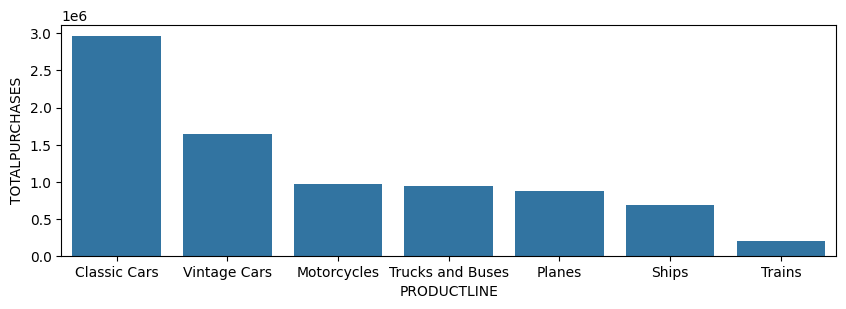

In [40]:
plt.rcParams["figure.figsize"] = (10, 3)
sns.barplot( x='PRODUCTLINE', y='TOTALPURCHASES', data = agg_product.sort_values
 ('TOTALPURCHASES', ascending=False))

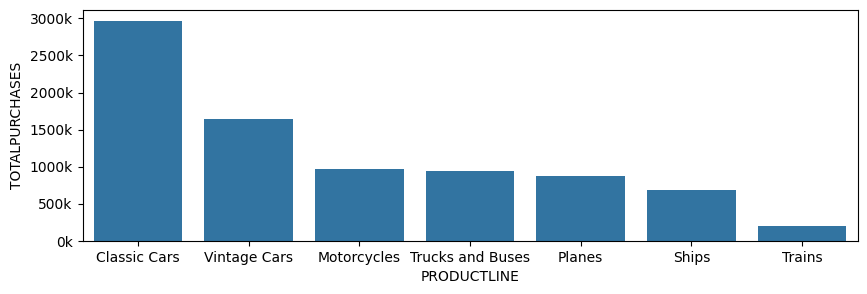

In [41]:
# Fungsi untuk memformat label sumbu y dalam ribuan
def format_ribuan(x, pos):
    return '%1.0fk' % (x * 1e-3)

plt.rcParams["figure.figsize"] = (10, 3)
sns.barplot(x='PRODUCTLINE', y='TOTALPURCHASES', data=agg_product.sort_values('TOTALPURCHASES', ascending=False))

# terapkan formatter ke sumbu y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ribuan))

plt.xlabel('PRODUCTLINE')
plt.ylabel('TOTALPURCHASES')
plt.show()


<Axes: xlabel='PRODUCTLINE', ylabel='ORDERNUMBER'>

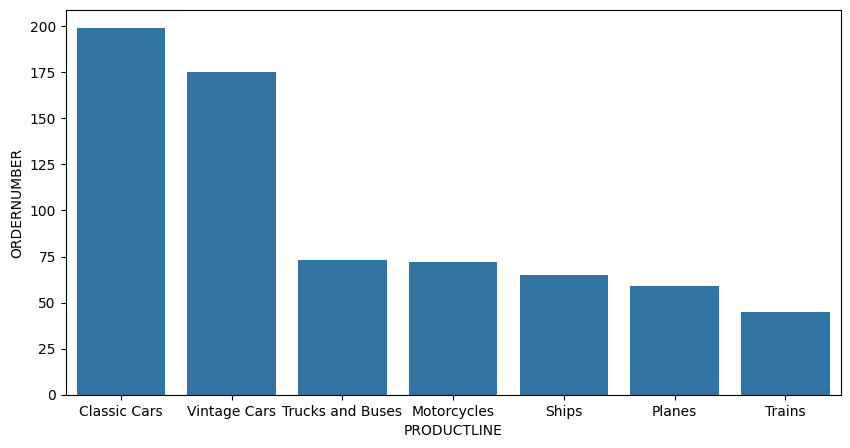

In [132]:
sns.barplot(x='PRODUCTLINE', y='ORDERNUMBER', data = agg_product.sort_values('ORDERNUMBER', ascending=False))

([<matplotlib.patches.Wedge at 0x7ffb99768b50>,
 [Text(0.47444784610033836, 0.9924208992815244, 'Classic Cars'),
  Text(-0.9524417662584144, 0.5503223436192209, 'Motorcycles'),
  Text(-1.082872262810949, -0.19335889541134374, 'Planes'),
  Text(-0.7925633657465628, -0.7627865437174938, 'Ships'),
  Text(-0.4985954886529338, -0.9805113659182858, 'Trains'),
  Text(-0.03764585432250013, -1.0993556247422074, 'Trucks and Buses'),
  Text(0.8933276501698032, -0.6418455495227009, 'Vintage Cars')],
 [Text(0.25878973423654816, 0.5413204905171951, '35.8%'),
  Text(-0.5195136906864078, 0.3001758237923023, '11.7%'),
  Text(-0.5906575978968812, -0.10546848840618749, '10.6%'),
  Text(-0.43230729040721605, -0.4160653874822693, '8.2%'),
  Text(-0.27196117562887295, -0.534824381409974, '2.5%'),
  Text(-0.02053410235772734, -0.5996485225866586, '11.4%'),
  Text(0.4872696273653471, -0.3500975724669277, '19.8%')])

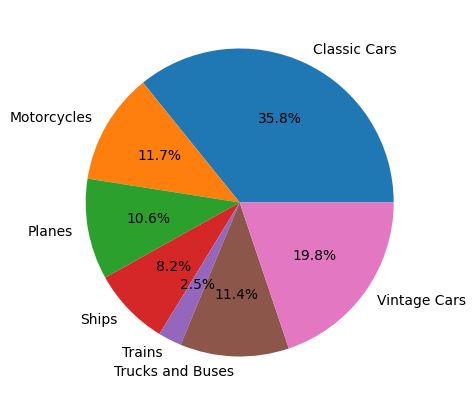

In [133]:
plt.pie(agg_product['TOTALPURCHASES'], labels = agg_product['PRODUCTLINE'],autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x7ffb98fd3eb0>,
 [Text(0.6762596969595196, 0.8675671860255082, 'Classic Cars'),
  Text(-0.5985410827589596, 0.9229022549813889, 'Motorcycles'),
  Text(-1.0143346878631343, 0.4255879944237126, 'Planes'),
  Text(-1.0843377055479848, -0.1849641595740426, 'Ships'),
  Text(-0.8613551876919451, -0.6841543982436817, 'Trains'),
  Text(-0.3882584899137188, -1.0292013141314575, 'Trucks and Buses'),
  Text(0.7670896002541482, -0.7883993564063401, 'Vintage Cars')],
 [Text(0.3688689256142834, 0.47321846510482257, '28.9%'),
  Text(-0.3264769542321597, 0.5034012299898484, '10.5%'),
  Text(-0.5532734661071641, 0.23213890604929774, '8.6%'),
  Text(-0.5914569302989008, -0.10088954158584142, '9.4%'),
  Text(-0.4698301023774245, -0.37317512631473543, '6.5%'),
  Text(-0.21177735813475568, -0.5613825349807949, '10.6%'),
  Text(0.4184125092295354, -0.4300360125852764, '25.4%')])

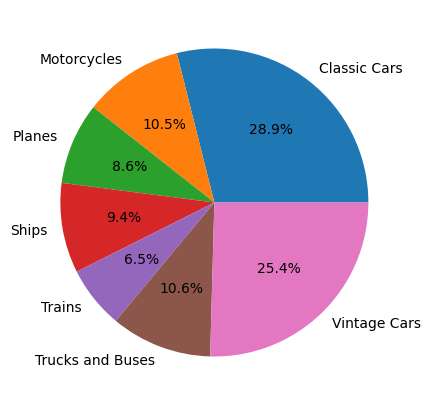

In [136]:
plt.pie(agg_product['ORDERNUMBER'], labels = agg_product['PRODUCTLINE'],autopct='%.1f%%')

penjualan dari waktu ke waktu

In [59]:
agg_penjualan = df_cleaned.groupby('ORDERDATE',
                                   as_index=False).agg({'QUANTITYORDERED' : 'sum',
                                                        'TOTALPURCHASES' : 'sum'})
agg_penjualan.head()

,ORDERDATE,QUANTITYORDERED,TOTALPURCHASES
0,2003-01-06,151,9982.25
1,2003-01-09,142,8976.96
2,2003-01-10,80,5955.74
3,2003-01-29,541,47886.21
4,2003-01-31,443,35084.80


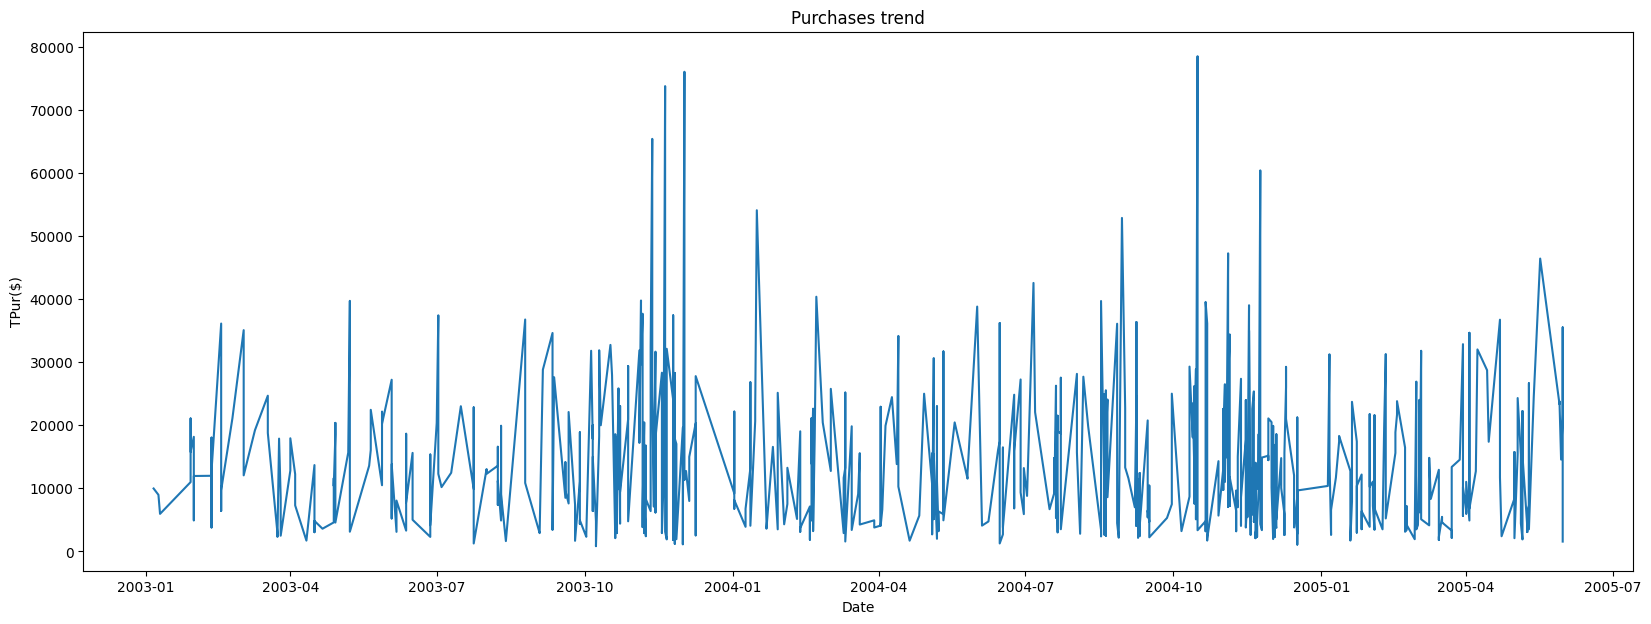

In [51]:
plt.rcParams["figure.figsize"] = (20,7)

plt.plot('ORDERDATE','TOTALPURCHASES', data=agg_penjualan)
plt.title('Purchases trend')
plt.xlabel('Date')
plt.ylabel('TPur($)')
plt.show()

<Axes: xlabel='ORDERDATE', ylabel='TOTALPURCHASES'>

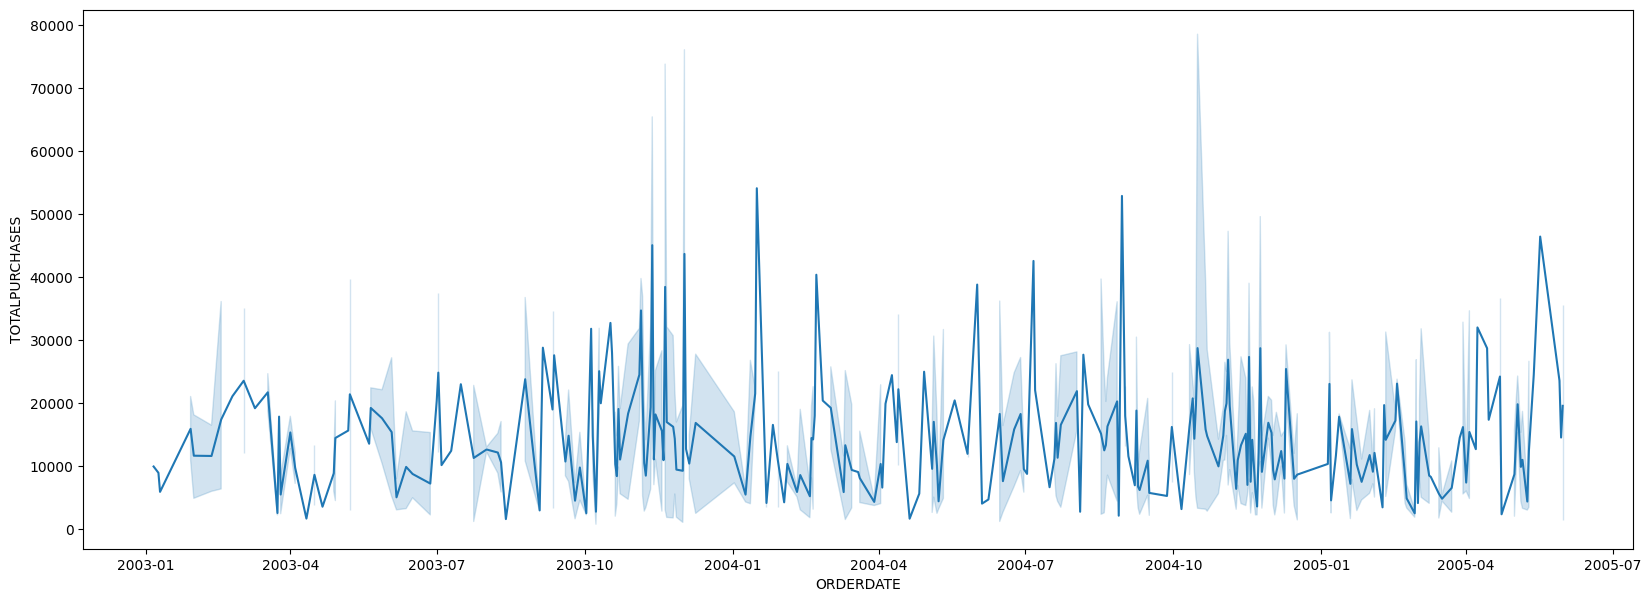

In [52]:
sns.lineplot(data = agg_penjualan, x= 'ORDERDATE', y='TOTALPURCHASES')

<Axes: xlabel='ORDERDATE', ylabel='QUANTITYORDERED'>

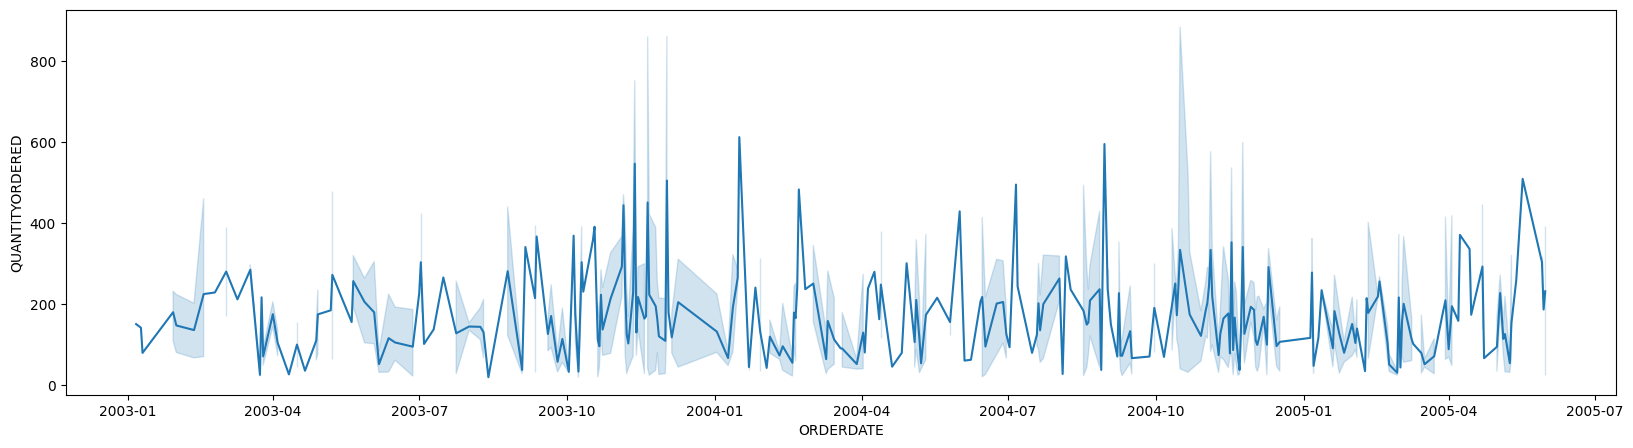

In [58]:
sns.lineplot(data = agg_penjualan, x= 'ORDERDATE', y='QUANTITYORDERED')

Dealsize berkorelasi dengan Total Penjualan

In [42]:
agg_dealsales = df_cleaned.groupby('DEALSIZE',
    as_index=False).agg({'TOTALPURCHASES':'sum',
                        'ORDERNUMBER' : 'nunique'})
agg_dealsales.head()


,DEALSIZE,TOTALPURCHASES,ORDERNUMBER
0,Large,738757.91,119
1,Medium,4961736.68,292
2,Small,2590392.20,287


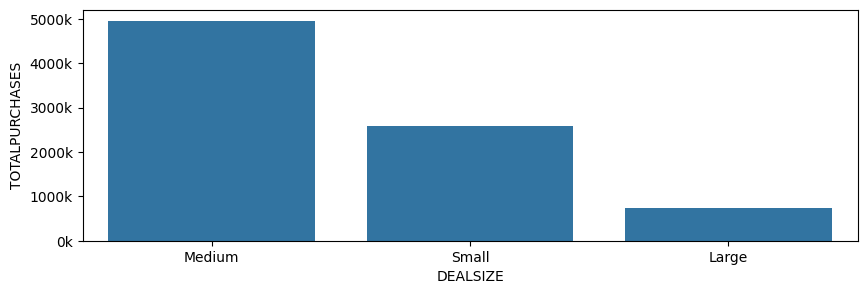

In [43]:
# Fungsi untuk memformat label sumbu y dalam ribuan
def format_ribuan(x, pos):
    return '%1.0fk' % (x * 1e-3)

plt.rcParams["figure.figsize"] = (10, 3)
sns.barplot(x='DEALSIZE', y='TOTALPURCHASES', data=agg_dealsales.sort_values('TOTALPURCHASES', ascending=False))

# terapkan formatter ke sumbu y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ribuan))

plt.xlabel('DEALSIZE')
plt.ylabel('TOTALPURCHASES')
plt.show()

([<matplotlib.patches.Wedge at 0x7e6fc9a3b250>,
 [Text(1.057181943973772, 0.30391830701002015, 'Large'),
  Text(-0.8401748435434492, 0.7100043889137172, 'Medium'),
  Text(0.6113039049408558, -0.9144985160206994, 'Small')],
 [Text(0.5766446967129665, 0.1657736220054655, '8.9%'),
  Text(-0.4582771873873358, 0.38727512122566393, '59.8%'),
  Text(0.33343849360410316, -0.49881737237492685, '31.2%')])

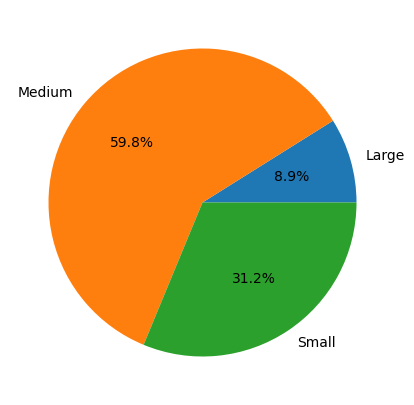

In [65]:
plt.pie(agg_dealsales['TOTALPURCHASES'], labels = agg_dealsales['DEALSIZE'],autopct='%.1f%%')

<Axes: xlabel='DEALSIZE', ylabel='ORDERNUMBER'>

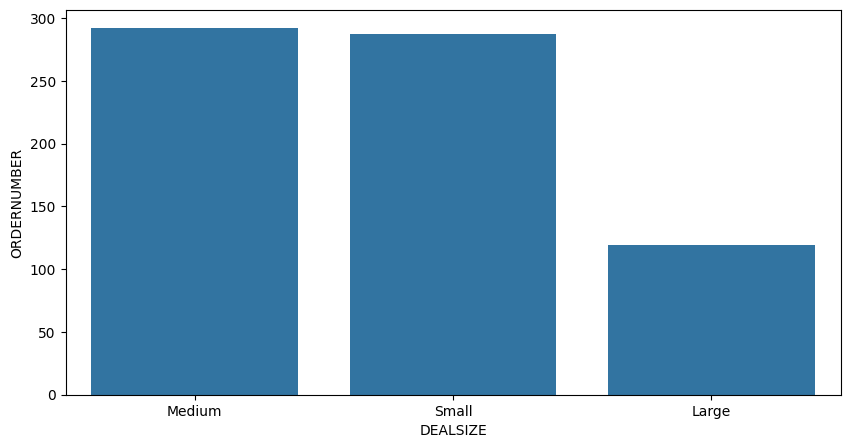

In [67]:
sns.barplot(x='DEALSIZE', y='ORDERNUMBER', data = agg_dealsales.sort_values('ORDERNUMBER', ascending=False))

([<matplotlib.patches.Wedge at 0x7e6fc97948b0>,
 [Text(0.9459582433702467, 0.5613938027800781, 'Large'),
  Text(-0.800236854829892, 0.7547323871227222, 'Medium'),
  Text(0.3029896041699132, -1.057448485631787, 'Small')],
 [Text(0.5159772236564981, 0.3062148015164062, '17.0%'),
  Text(-0.4364928299072138, 0.4116722111578484, '41.8%'),
  Text(0.16526705681995263, -0.5767900830718837, '41.1%')])

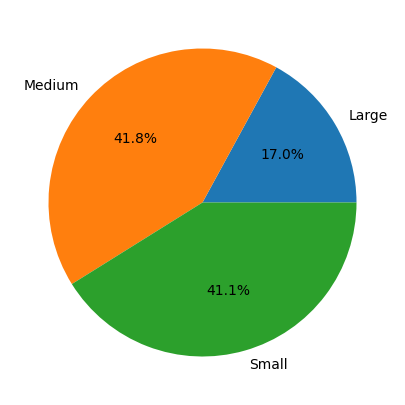

In [68]:
plt.pie(agg_dealsales['ORDERNUMBER'], labels = agg_dealsales['DEALSIZE'],autopct='%.1f%%')